In [157]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [158]:
country_data = pd.read_csv("../country_data.csv")

country_data

,Rank,Country,Players,Points,Number,Games,Badges,XP,Hours
0,0,Unknown,135643,86532124.75,137664177,31410891,5453964,2252121996,412471186.4
1,1,United States,59698,52132889.98,84410455,20379201,2569218,974895706,236137390.5
2,2,Russian Federation,31058,24753943.31,37279292,7247856,1657378,693424533,104656082.0
3,3,Germany,21750,18214362.15,28423805,6658939,1381807,590848431,86523185.4
4,4,United Kingdom (Great Britain),16225,15635912.83,25101789,5780703,786975,294574732,68131144.6
...,...,...,...,...,...,...,...,...,...
248,248,Mauritania,10,3231.50,5663,788,144,43292,24574.4
249,249,French Guiana,7,2587.67,5310,1100,81,16709,20665.0
250,250,Anguilla,14,2089.76,4749,626,116,21427,18169.2
251,251,"Moldova, Republic of",2,617.02,752,129,116,17486,1939.9


In [159]:
# remove "Unknown" country so we can view data for each individual country
# "Unknown" could contain results from many different countries

cleaned_country_df = country_data.iloc[1:]

cleaned_country_df

,Rank,Country,Players,Points,Number,Games,Badges,XP,Hours
1,1,United States,59698,52132889.98,84410455,20379201,2569218,974895706,236137390.5
2,2,Russian Federation,31058,24753943.31,37279292,7247856,1657378,693424533,104656082.0
3,3,Germany,21750,18214362.15,28423805,6658939,1381807,590848431,86523185.4
4,4,United Kingdom (Great Britain),16225,15635912.83,25101789,5780703,786975,294574732,68131144.6
5,5,Canada,12483,10999031.70,17436104,4012880,606502,239174494,49354715.3
...,...,...,...,...,...,...,...,...,...
248,248,Mauritania,10,3231.50,5663,788,144,43292,24574.4
249,249,French Guiana,7,2587.67,5310,1100,81,16709,20665.0
250,250,Anguilla,14,2089.76,4749,626,116,21427,18169.2
251,251,"Moldova, Republic of",2,617.02,752,129,116,17486,1939.9


In [160]:
# view top 10 countries

top_10_df = cleaned_country_df.iloc[0:10]

top_10_df

,Rank,Country,Players,Points,Number,Games,Badges,XP,Hours
1,1,United States,59698,52132889.98,84410455,20379201,2569218,974895706,236137390.5
2,2,Russian Federation,31058,24753943.31,37279292,7247856,1657378,693424533,104656082.0
3,3,Germany,21750,18214362.15,28423805,6658939,1381807,590848431,86523185.4
4,4,United Kingdom (Great Britain),16225,15635912.83,25101789,5780703,786975,294574732,68131144.6
5,5,Canada,12483,10999031.70,17436104,4012880,606502,239174494,49354715.3
6,6,China,15605,10847234.66,17138407,6168652,1100485,506417923,54823363.8
7,7,Brazil,15569,10136859.28,16173137,3918546,774781,247132541,54157619.5
8,8,Poland,11358,9085626.49,13802221,3123884,523117,178278957,39163756.6
9,9,Japan,9548,8802348.47,13143190,3328328,698257,265270862,38756414.3
10,10,France,7675,7817051.60,11611862,2362871,384431,130107826,29692105.0


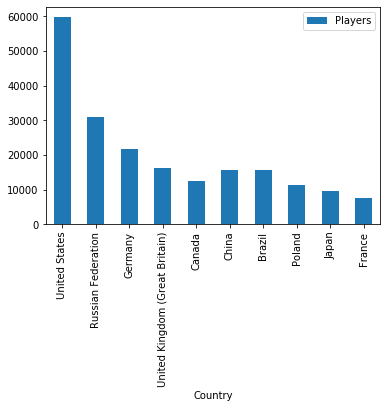

In [161]:
# view number of players for top 10 countries

top_10_df.plot(x="Country", y="Players", kind="bar")

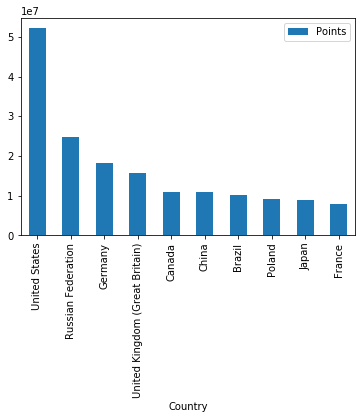

In [162]:
# view points for top 10 countries

top_10_df.plot(x="Country", y="Points", kind="bar")

In [163]:
# create df that shows the values averaged by player count for each country
player_avg_df = cleaned_country_df.copy()
player_avg_df.columns
for i, column in enumerate(player_avg_df.columns):
    if(i > 2):
        player_avg_df[column + "_avg"] = player_avg_df[column] / player_avg_df["Players"]
        del player_avg_df[column]
    print(i, column)
player_avg_df

0 Rank
1 Country
2 Players
3 Points
4 Number
5 Games
6 Badges
7 XP
8 Hours


,Rank,Country,Players,Points_avg,Number_avg,Games_avg,Badges_avg,XP_avg,Hours_avg
1,1,United States,59698,873.276994,1413.957838,341.371587,43.036919,16330.458407,3955.532690
2,2,Russian Federation,31058,797.023096,1200.312061,233.365188,53.363964,22326.760674,3369.698049
3,3,Germany,21750,837.441938,1306.841609,306.158115,63.531356,27165.445103,3978.077490
4,4,United Kingdom (Great Britain),16225,963.692624,1547.105639,356.283698,48.503852,18155.607519,4199.146046
5,5,Canada,12483,881.120860,1396.787952,321.467596,48.586237,19160.017143,3953.754330
...,...,...,...,...,...,...,...,...,...
248,248,Mauritania,10,323.150000,566.300000,78.800000,14.400000,4329.200000,2457.440000
249,249,French Guiana,7,369.667143,758.571429,157.142857,11.571429,2387.000000,2952.142857
250,250,Anguilla,14,149.268571,339.214286,44.714286,8.285714,1530.500000,1297.800000
251,251,"Moldova, Republic of",2,308.510000,376.000000,64.500000,58.000000,8743.000000,969.950000


The above numbers seem relatively high (over 341 games per player, and almost 4k hours per player in the US alone) - this is likely due to the averages being a little skewed by large values for the very top players, although it does represent a player with a ranking of around 100k (because the dataset includes rankings from 1 to 200k)

This might be reasonable, because at the time of writing (9/17/2022) I (gendotti) personally have a ranking of ~159k and have 158 games and ~1900 hours put into Steam, so a player ranked around 100k would likely have more games, hours, etc.

Cleaning the data by removing individual player outliers from the data is recommended (see the other data set)

In [164]:
# show the top 10 countries by hours per player
# to determine which countries have the most "hardcore" gamers
top_10_hours_per_player_df = player_avg_df.sort_values(by="Hours_avg", ascending=False)

top_10_hours_per_player_df = top_10_hours_per_player_df.iloc[0:10]

top_10_hours_per_player_df

,Rank,Country,Players,Points_avg,Number_avg,Games_avg,Badges_avg,XP_avg,Hours_avg
236,236,Sao Tome & Principe,13,601.781538,862.538462,85.538462,21.230769,7398.461538,69578.584615
140,140,St. Helena,48,888.435000,1425.854167,230.937500,58.958333,23510.291667,13225.750000
242,242,Martinique,22,322.005909,557.090909,86.590909,36.681818,12629.636364,11198.181818
167,167,San Marino,63,480.893016,814.492063,208.730159,63.095238,24353.650794,10478.596825
115,115,Macau,73,987.758767,1464.479452,591.698630,75.273973,32493.986301,9659.384932
243,243,Lesotho,11,610.923636,951.000000,120.727273,27.818182,7153.090909,6865.900000
150,150,Svalbard & Jan Mayen Islands,39,923.607949,1420.000000,268.410256,42.410256,20961.923077,5684.125641
168,168,British Indian Ocean Territory,53,564.409245,947.301887,144.773585,33.679245,13479.150943,5635.720755
137,137,Reunion,55,842.504545,1365.109091,287.272727,58.709091,19923.527273,5547.938182
246,246,Comoros,10,430.317000,743.000000,421.300000,21.600000,6576.500000,5536.820000


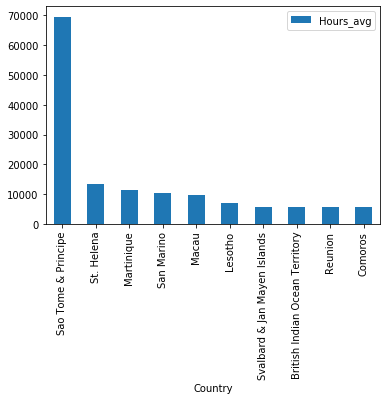

In [165]:
top_10_hours_per_player_df.plot(kind="bar", x="Country", y="Hours_avg")

It looks like there are some players who found a glitch or exploit in the system to increase their hours, because it is unlikely that they spent 70k hours on steam on average in Sao Tome & Principe

The rest of the values still look high, but they are likely related to the countries all being relatively small, with small gamer communities that use Steam, and the players all acting the same way within those small, isolated communities. For example, they could be in a guild together (the largest player count for these countries is 73), and play the same or similar games at the same time. This would result in their profiles looking similar from a statistics viewpoint, and would be relatively easy to verify if we had individual data for each player within a country, because we could look at measures of variation within the population of hours, number of games, etc., and look at which individual games and achievements are common within that country.

In [166]:
# create df that shows the values averaged by hours for each country
# other than player count
hour_avg_df = cleaned_country_df.copy()
hour_avg_df.columns
for i, column in enumerate(hour_avg_df.columns):
    if(column not in set(["Rank", "Country", "Players", "Hours"])):
        hour_avg_df[column + "_avg"] = hour_avg_df[column] / hour_avg_df["Hours"]
        del hour_avg_df[column]
hour_avg_df

,Rank,Country,Players,Hours,Points_avg,Number_avg,Games_avg,Badges_avg,XP_avg
1,1,United States,59698,236137390.5,0.220774,0.357463,0.086302,0.010880,4.128511
2,2,Russian Federation,31058,104656082.0,0.236527,0.356208,0.069254,0.015836,6.625745
3,3,Germany,21750,86523185.4,0.210514,0.328511,0.076961,0.015970,6.828787
4,4,United Kingdom (Great Britain),16225,68131144.6,0.229497,0.368433,0.084847,0.011551,4.323643
5,5,Canada,12483,49354715.3,0.222857,0.353281,0.081307,0.012289,4.846031
...,...,...,...,...,...,...,...,...,...
248,248,Mauritania,10,24574.4,0.131499,0.230443,0.032066,0.005860,1.761671
249,249,French Guiana,7,20665.0,0.125220,0.256956,0.053230,0.003920,0.808565
250,250,Anguilla,14,18169.2,0.115017,0.261376,0.034454,0.006384,1.179303
251,251,"Moldova, Republic of",2,1939.9,0.318068,0.387649,0.066498,0.059797,9.013867


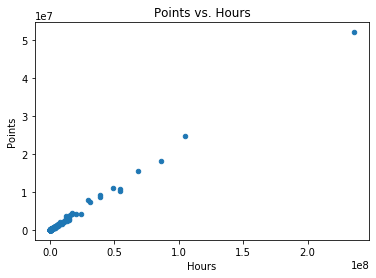

In [167]:
# scatterplot and linear regression for points vs. hours
temp_axes1 = cleaned_country_df.plot(kind="scatter", x="Hours", 
                                       y="Points", 
                                       title="Points vs. Hours")

In [168]:
point_per_hour_model = LinearRegression(fit_intercept=False)
point_per_hour_model.fit([[a] for a in cleaned_country_df["Hours"]], cleaned_country_df["Points"])
print(point_per_hour_model)
print('Weight coefficients: ', point_per_hour_model.coef_)
print('y-axis intercept: ', point_per_hour_model.intercept_) 

LinearRegression(fit_intercept=False)
Weight coefficients:  [0.22099987]
y-axis intercept:  0.0


In [169]:
# R^2 score (variance) for the linear regression model
r2_achievement = point_per_hour_model.score([[a] for a in cleaned_country_df["Hours"]], cleaned_country_df["Points"])
print("R^2 for point_per_hour_model: {}".format(r2_achievement))

R^2 for point_per_hour_model: 0.9964403559644708


In [170]:
x_min = cleaned_country_df["Hours"].min()
x_max = cleaned_country_df["Hours"].max()
y_min = point_per_hour_model.predict([[x_min]])
y_max = point_per_hour_model.predict([[x_max]])
print(x_min, x_max)

13.9 236137390.5


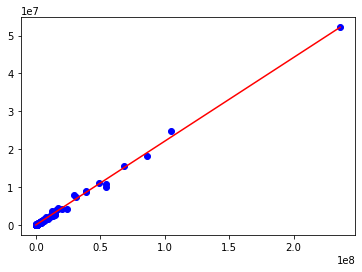

In [171]:
plt.scatter([[a] for a in cleaned_country_df["Hours"]], cleaned_country_df["Points"], c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

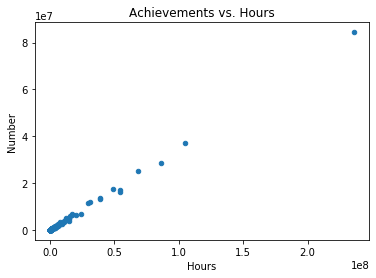

In [172]:
# scatterplot and linear regression for # of achievements vs. hours
temp_axes2 = cleaned_country_df.plot(kind="scatter", x="Hours", 
                                       y="Number", 
                                       title="Achievements vs. Hours")

In [173]:
achievement_per_hour_model = LinearRegression(fit_intercept=False)
achievement_per_hour_model.fit([[a] for a in cleaned_country_df["Hours"]], cleaned_country_df["Number"])
print(achievement_per_hour_model)
print('Weight coefficients: ', achievement_per_hour_model.coef_)
print('y-axis intercept: ', achievement_per_hour_model.intercept_) 

LinearRegression(fit_intercept=False)
Weight coefficients:  [0.35133893]
y-axis intercept:  0.0


In [174]:
# R^2 score (variance) for the linear regression model
r2_achievement = achievement_per_hour_model.score([[a] for a in cleaned_country_df["Hours"]], cleaned_country_df["Number"])
print("R^2 for achievement_per_hour_model: {}".format(r2_achievement))

R^2 for achievement_per_hour_model: 0.9970610575397182


In [175]:
x_min = cleaned_country_df["Hours"].min()
x_max = cleaned_country_df["Hours"].max()
y_min = achievement_per_hour_model.predict([[x_min]])
y_max = achievement_per_hour_model.predict([[x_max]])
print(x_min, x_max)

13.9 236137390.5


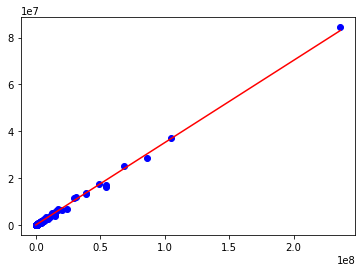

In [176]:
plt.scatter([[a] for a in cleaned_country_df["Hours"]], cleaned_country_df["Number"], c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

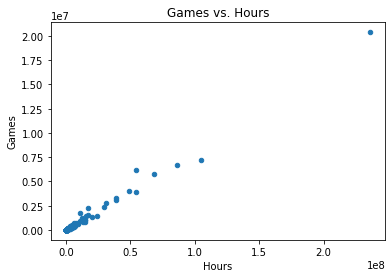

In [177]:
# scatterplot and linear regression for # games vs. hours
temp_axes3 = cleaned_country_df.plot(kind="scatter", x="Hours", 
                                       y="Games", 
                                       title="Games vs. Hours")

In [178]:
games_per_hour_model = LinearRegression(fit_intercept=False)
games_per_hour_model.fit([[a] for a in cleaned_country_df["Hours"]], cleaned_country_df["Games"])
print(games_per_hour_model)
print('Weight coefficients: ', games_per_hour_model.coef_)
print('y-axis intercept: ', games_per_hour_model.intercept_) 

LinearRegression(fit_intercept=False)
Weight coefficients:  [0.08342957]
y-axis intercept:  0.0


In [179]:
# R^2 score (variance) for the linear regression model
r2_games = games_per_hour_model.score([[a] for a in cleaned_country_df["Hours"]], cleaned_country_df["Games"])
print("R^2 for games_per_hour_model: {}".format(r2_games))

R^2 for games_per_hour_model: 0.9868906369424175


In [180]:
x_min = cleaned_country_df["Hours"].min()
x_max = cleaned_country_df["Hours"].max()
y_min = games_per_hour_model.predict([[x_min]])
y_max = games_per_hour_model.predict([[x_max]])
print(x_min, x_max)

13.9 236137390.5


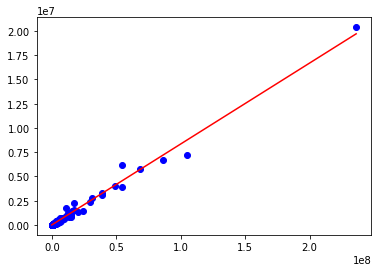

In [181]:
plt.scatter([[a] for a in cleaned_country_df["Hours"]], cleaned_country_df["Games"], c='blue')
plt.plot([x_min, x_max], [y_min, y_max], c='red')

In [182]:
# show actual vs. predicted statistics for my profile (gendotti)
# first import the other dataset
player_df = pd.read_csv("../amended_first_200k_players.csv")

C:\Users\patri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [183]:
# then get my profile from the other dataset (feel free to get your profile!)
player_name = "gendotti"
my_profile = player_df.loc[player_df["Player Name"] == player_name]
my_profile

,Unnamed: 0,Rank,Player Id,Player Name,Best achievements,Points,#,Games,100%,All,Badges,XP,Member since,Hours,Last update
157897,157867,157898,76561198012265407,gendotti,"[""It's Medicinal (Rebel Inc: Escalation – 2.17...",652.0,945,155,1,158.0,7,2105,07/27/2009,1897.5,08/28/2022 08:22:58


In [184]:
# use the above info to fill out the variables for the linear regression predictions
hours = my_profile["Hours"].values[0]
points = my_profile["Points"].values[0]
achievements = my_profile["#"].values[0]
games = my_profile["Games"].values[0]

In [185]:
# predict the number of points my profile should have
# based on the number of hours on Steam
point_prediction = point_per_hour_model.predict([[hours]])
print(f"True output: {points}")
print(f"Predicted output: {point_prediction[0]}")
print(f"Prediction Error: {point_prediction[0]-points}")

True output: 652.0
Predicted output: 419.34725560422595
Prediction Error: -232.65274439577405


The error is relatively high (over 30% low vs. my actual number of points), but I choose to think that means I'm a good gamer, or maybe that I play uncommon games with more achievements!

In [186]:
achievement_prediction = achievement_per_hour_model.predict([[hours]])
print(f"True output: {achievements}")
print(f"Predicted output: {round(achievement_prediction[0])}")
print(f"Prediction Error: {round(achievement_prediction[0])-achievements}")

True output: 945
Predicted output: 667.0
Prediction Error: -278.0


The error is relatively high (over 25% low vs. my actual number of points), but I choose to think that means I'm a good gamer, or maybe that I play uncommon games with more achievements (as above)! Since this is low by almost the same percentage as the previous prediction for achievement points, those are likely highly correlated - which makes sense, because achievements grant a certain number of points on this website. The type and number of games played may contribute fluctuations in these predictions - I personally play a lot of grand strategy games and they tend to have a lot of achievements and take a long time to play. Since the range of achievements within one game is so large, and the game takes a long time to play, different players can wind up with highly different achievements and the resulting achievements are worth more because they are uncommon due to how playstyles differ, the size of the game, and the length of the game. For example, Europa Universalis IV has a total of 190 achievements in the base game, worth a grand total of 320.89 points. The only game I've completed, on the other hand, is E-Startup, a pre-release game that has 10 achievements (most of which can be obtained in one playthrough) worth a grand total of 14.58 points.

In [188]:
game_prediction = games_per_hour_model.predict([[hours]])
print(f"True output: {games}")
print(f"Predicted output: {round(game_prediction[0])}")
print(f"Prediction Error: {round(game_prediction[0])-games}")

True output: 155
Predicted output: 158.0
Prediction Error: 3.0


Bingo! I have 155 games (the website counts DLCs and expansions as separate games) and the linear model predicted I would have 158.